<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/16_8_3Challenge_Gradedi_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
* Do you think your model is satisfactory? If so, why?
* In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
* For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

#**Assignment: predicting house prices**

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database.

 You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

postgres_user = 'dsbc_student'

postgres_pw = '7*.8G9QH21'

postgres_host = '142.93.121.174'

postgres_port = '5432'

postgres_db = 'houseprices'







In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db =  'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp0 = pd.read_sql_query('select * FROM houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
hp=hp0.copy()

**REVIEW DATA SET**

In [6]:
hp.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [7]:
hp.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


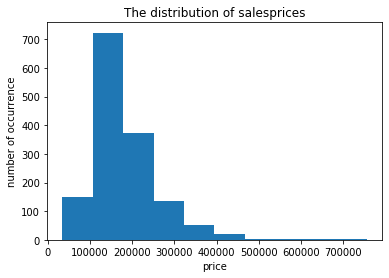

In [8]:
plt.rcParams["figure.figsize"] = [6,4]
plt.hist(hp.saleprice)
plt.title("The distribution of salesprices")
plt.xlabel("price")
plt.ylabel("number of occurrence")
plt.show()

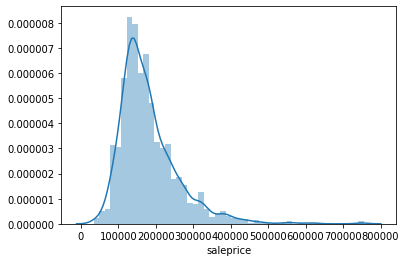

In [9]:
plt.rcParams["figure.figsize"] = [6,4]

sns.distplot(hp.saleprice)

In [0]:
pd.set_option('display.max_rows',None)

**FIND COLUMNS THAT HAVE  NULLS**

**Percentage null**

In [11]:
hp.isna().mean()*100

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
bsmtqual          2.534247
bsmtcond          2.534247
bsmtexposure      2.602740
bsmtfintype1      2.534247
bsmtfinsf1        0.000000
bsmtfintype2      2.602740
bsmtfinsf2        0.000000
b

**Dropping  coulumns alley,poolqc,fence,miscfeature-- too many missing values**



In [0]:
hp.drop(['alley','poolqc','fence','miscfeature','fireplacequ'],axis=1,inplace=True)

In [13]:
n=[col for col in list(hp) if hp[col].dtype!=object]
len(n)

38

**HISTOGRAM OF NUMERICAL FEATURES** 

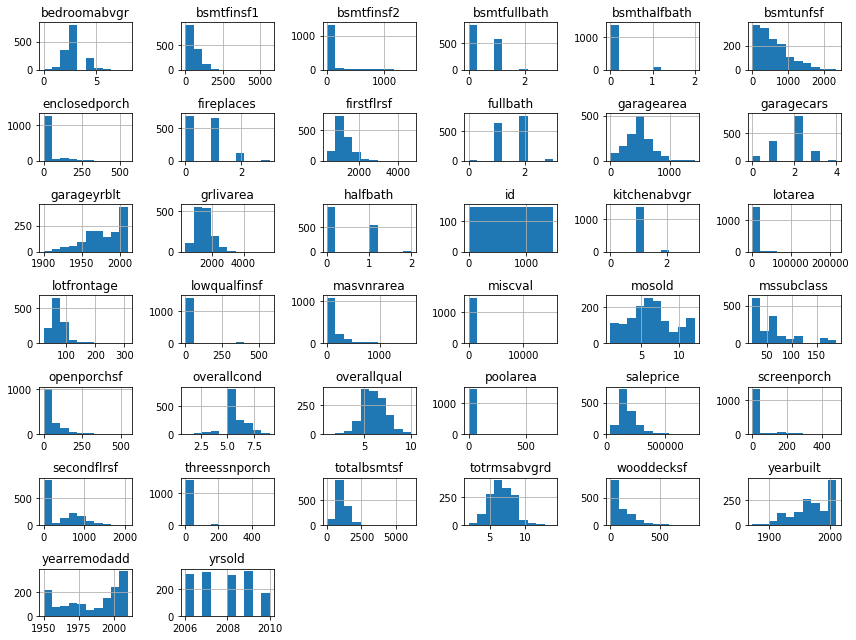

In [0]:
plt.rcParams["figure.figsize"] = [12,9]
hp.hist()
plt.tight_layout()

**SEVERAL OF THESE WILL HAVE TO GO STARTING WITH id**

**WILL DETREMINE REST WITH CORRELATION MATRIX**

**DROP ID AND YRSOLD MOSOLD**

In [0]:
hp.drop(['id','yrsold','mosold'],axis=1,inplace=True)  #drop id

In [15]:
hp.isnull().sum()

mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
street             0
lotshape           0
landcontour        0
utilities          0
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
roofstyle          0
roofmatl           0
exterior1st        0
exterior2nd        0
masvnrtype         8
masvnrarea         8
exterqual          0
extercond          0
foundation         0
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfinsf1         0
bsmtfintype2      38
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
heating            0
heatingqc          0
centralair         0
electrical         1
firstflrsf         0
secondflrsf        0
lowqualfinsf       0
grlivarea          0
bsmtfullbath       0
bsmthalfbath       0
fullbath     

**CHECK FOR COULUMNS WITH  OVER 1,000 ZEROES**

In [16]:
for col in list(hp):
  z=(hp[col]==0).sum()
  if z>1000: print (col,"  ",z)
  #if (hp[col]==0).sum()>0: print(col)

bsmtfinsf2    1293
lowqualfinsf    1434
bsmthalfbath    1378
enclosedporch    1252
threessnporch    1436
screenporch    1344
poolarea    1453
miscval    1408


**DROP -- TOO MANY ZEROS**



In [0]:
hp.drop(columns=['bsmtfinsf2','screenporch','poolarea','threessnporch','lowqualfinsf','enclosedporch',"bsmthalfbath","poolarea",'miscval'],inplace=True)

In [18]:
hp.head(2)

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,WD,Normal,181500


**DROP GARAGEYEAR BUILT**

In [0]:
hp.drop('garageyrblt',axis=1,inplace=True)

  **ONLY A FEW NULLS LEFT SO DROP**

In [0]:
hp.dropna(inplace=True)

In [21]:
n=[col for col in list(hp) if hp[col].dtype!=object]
n

['mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtunfsf',
 'totalbsmtsf',
 'firstflrsf',
 'secondflrsf',
 'grlivarea',
 'bsmtfullbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'saleprice']

In [22]:
hp.head(1)

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,WD,Normal,208500


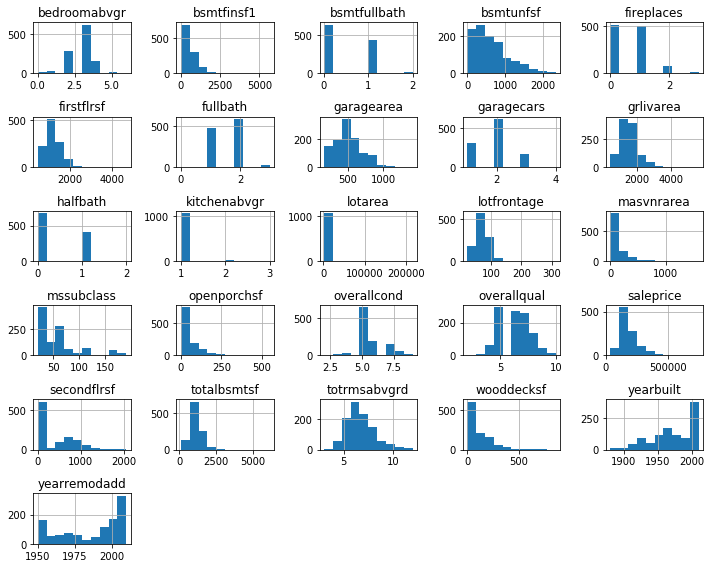

In [27]:

plt.rcParams['figure.figsize'] = (10.0, 8.0)
hp.hist()
plt.tight_layout()

**DROP YEARREMODADD + YEARBUILT**

In [0]:
hp.drop(['yearremodadd','yearbuilt'],axis=1,inplace=True)

In [0]:
nol=list(hp.select_dtypes(exclude='object').columns)

In [30]:
len(nol)

24

**USE Z-SCORE TO CHECK FOR OUTLIERS**

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hp[nol]))

z1=(z>1)
z2=(z>2)



In [32]:
z1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False]])

**SOME VALUES GREATER THAN ONE STD AWAY**



**HISTOGRAMS OF THE 7 CONITNUOUS VARIABLES**

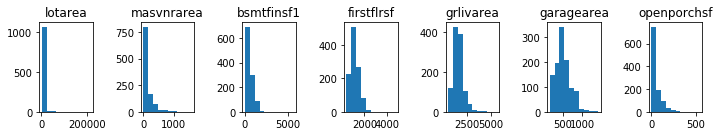

In [33]:
plt.figure(figsize=(10,2))
#plt.rcParams["figure.figsize"] = [5,4]
plt.subplot(1,7,1)
plt.hist(hp['lotarea'])
plt.title('lotarea')

plt.subplot(1,7,2)
plt.hist(hp['masvnrarea'])
plt.title('masvnrarea')

plt.subplot(1,7,3)
plt.hist(hp['bsmtfinsf1'])
plt.title('bsmtfinsf1')

plt.subplot(1,7,4)
plt.hist(hp['firstflrsf'])
plt.title('firstflrsf')

plt.subplot(1,7,5)
plt.hist(hp['grlivarea'])
plt.title('grlivarea')

plt.subplot(1,7,6)
plt.hist(hp['garagearea'])
plt.title('garagearea')

plt.subplot(1,7,7)
plt.hist(hp['openporchsf'])
plt.title('openporchsf')

plt.tight_layout()

**BOXPLOTS FOR 7 CONTINUOUS VARIABLES**

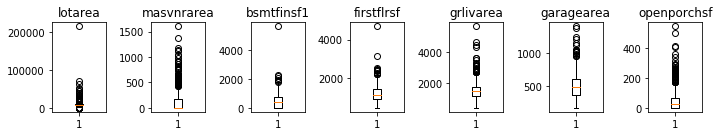

In [34]:

plt.figure(figsize=(10,2))

plt.subplot(1,7,1)
plt.boxplot(hp['lotarea'])
plt.title('lotarea')

plt.subplot(1,7,2)
plt.boxplot(hp['masvnrarea'])
plt.title('masvnrarea')

plt.subplot(1,7,3)
plt.boxplot(hp['bsmtfinsf1'])
plt.title('bsmtfinsf1')

plt.subplot(1,7,4)
plt.boxplot(hp['firstflrsf'])
plt.title('firstflrsf')

plt.subplot(1,7,5)
plt.boxplot(hp['grlivarea'])
plt.title('grlivarea')

plt.subplot(1,7,6)
plt.boxplot(hp['garagearea'])
plt.title('garagearea')

plt.subplot(1,7,7)
plt.boxplot(hp['openporchsf'])
plt.title('openporchsf')

plt.tight_layout()

In [0]:
from scipy.stats.mstats import winsorize

In [0]:
hp['lotarea'] = winsorize(hp["lotarea"], (.05,.10))
hp['masvnrarea'] = winsorize(hp["masvnrarea"], (.05,.10))
hp['bsmtfinsf1'] = winsorize(hp["bsmtfinsf1"], (.05,.10))
hp['firstflrsf'] = winsorize(hp["firstflrsf"], (.05,.10))
hp['grlivarea'] = winsorize(hp["grlivarea"], (.05,.10))
hp['garagearea'] = winsorize(hp["garagearea"], (.05,.10))
hp['totalbsmtsf'] = winsorize(hp["totalbsmtsf"], (.05,.10))


**AFTER WINSORIZING**

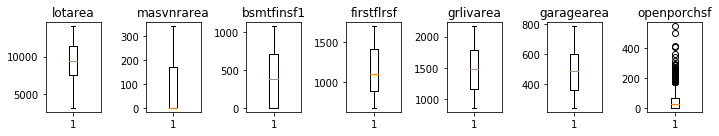

In [37]:

plt.figure(figsize=(10,2))

plt.subplot(1,7,1)
plt.boxplot(hp['lotarea'])
plt.title('lotarea')

plt.subplot(1,7,2)
plt.boxplot(hp['masvnrarea'])
plt.title('masvnrarea')

plt.subplot(1,7,3)
plt.boxplot(hp['bsmtfinsf1'])
plt.title('bsmtfinsf1')

plt.subplot(1,7,4)
plt.boxplot(hp['firstflrsf'])
plt.title('firstflrsf')

plt.subplot(1,7,5)
plt.boxplot(hp['grlivarea'])
plt.title('grlivarea')

plt.subplot(1,7,6)
plt.boxplot(hp['garagearea'])
plt.title('garagearea')

plt.subplot(1,7,7)
plt.boxplot(hp['openporchsf'])
plt.title('openporchsf')

plt.tight_layout()

In [38]:
hp[nol].corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,saleprice
mssubclass,1.000000,-0.389466,-0.426530,0.031639,-0.085553,0.032962,-0.063586,-0.147155,-0.287352,-0.254363,0.319176,0.079602,-0.013040,0.119495,0.206259,-0.044628,0.258401,0.038180,-0.029575,-0.031638,-0.089676,-0.018514,0.006799,-0.089478
lotfrontage,-0.389466,1.000000,0.637413,0.241169,-0.047132,0.178447,0.142635,0.111368,0.315014,0.367326,0.074953,0.336630,0.115151,0.189692,0.043414,0.277136,0.007411,0.354714,0.260293,0.285748,0.331937,0.081338,0.160862,0.343978
lotarea,-0.426530,0.637413,1.000000,0.274060,-0.054600,0.167429,0.163560,0.125686,0.368633,0.417041,0.139744,0.437549,0.112432,0.215836,0.114722,0.325751,-0.001508,0.432048,0.331395,0.321557,0.355146,0.181634,0.156881,0.450580
overallqual,0.031639,0.241169,0.274060,1.000000,-0.189587,0.428763,0.152125,0.297384,0.531136,0.507843,0.265906,0.614685,0.107138,0.597881,0.239893,0.091462,-0.141071,0.465733,0.409725,0.605466,0.565910,0.273652,0.335884,0.795437
overallcond,-0.085553,-0.047132,-0.054600,-0.189587,1.000000,-0.199550,-0.053571,-0.169743,-0.265898,-0.183313,0.004047,-0.146608,-0.072778,-0.225995,-0.089625,0.012300,-0.070660,-0.093309,-0.030731,-0.269616,-0.238099,-0.018856,-0.084405,-0.138511
masvnrarea,0.032962,0.178447,0.167429,0.428763,-0.199550,1.000000,0.231086,0.109811,0.381187,0.362573,0.126594,0.368642,0.124334,0.287195,0.186042,0.136143,-0.000276,0.324837,0.239993,0.401501,0.383951,0.172131,0.150360,0.455809
bsmtfinsf1,-0.063586,0.142635,0.163560,0.152125,-0.053571,0.231086,1.000000,-0.623696,0.371106,0.343094,-0.162873,0.085751,0.664908,0.017283,-0.025696,-0.098887,-0.030362,0.013285,0.215134,0.155248,0.214926,0.180689,0.066155,0.321754
bsmtunfsf,-0.147155,0.111368,0.125686,0.297384,-0.169743,0.109811,-0.623696,1.000000,0.390728,0.334115,-0.020506,0.244998,-0.470766,0.314788,-0.080332,0.141845,0.060984,0.228538,0.040166,0.277398,0.229311,-0.012039,0.140096,0.191247
totalbsmtsf,-0.287352,0.315014,0.368633,0.531136,-0.265898,0.381187,0.371106,0.390728,1.000000,0.893414,-0.279439,0.386377,0.275385,0.380760,-0.160436,0.031032,0.036754,0.266787,0.319825,0.515239,0.537565,0.226965,0.255743,0.616908
firstflrsf,-0.254363,0.367326,0.417041,0.507843,-0.183313,0.362573,0.343094,0.334115,0.893414,1.000000,-0.254861,0.481899,0.248245,0.382373,-0.176946,0.096597,0.067476,0.365753,0.389586,0.479504,0.513008,0.241716,0.222000,0.601982


In [39]:
hp[nol].corr().size

576

**HEAT MAP**

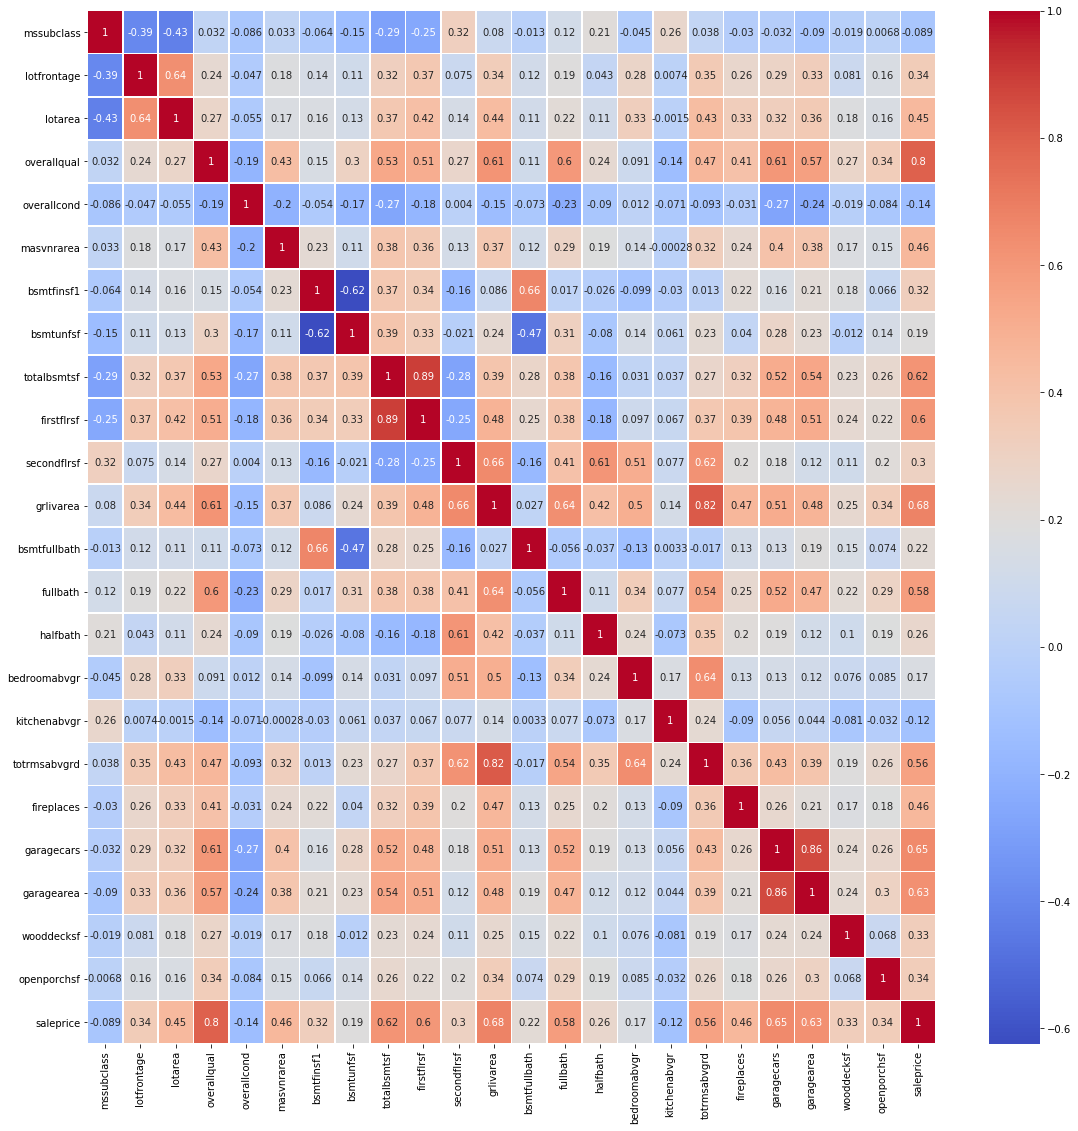

In [40]:
plt.figure(figsize=(19,19))
sns.heatmap(hp[nol].corr(),annot=True,linewidth=0.5,cmap='coolwarm')

ONLY ONE HIGH CORRELATIONS  FURSTFLSF/TOTALBSMTSF 

**DROP TOTALBSMTSF**

In [0]:
hp.drop(['totalbsmtsf'],axis=1,inplace=True)

In [0]:
nol=list(hp.select_dtypes(exclude='object').columns)

**CREATE LIST OF OBJECT FEATURES**

In [0]:
object_list=list(hp.select_dtypes(['object']).columns)

In [0]:
hp_object=hp[object_list]

In [45]:
hp_object.head(3)

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


**PLOT CATEGORICAL SUBFEATURES IN ORDER OF IMPORTANCE**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

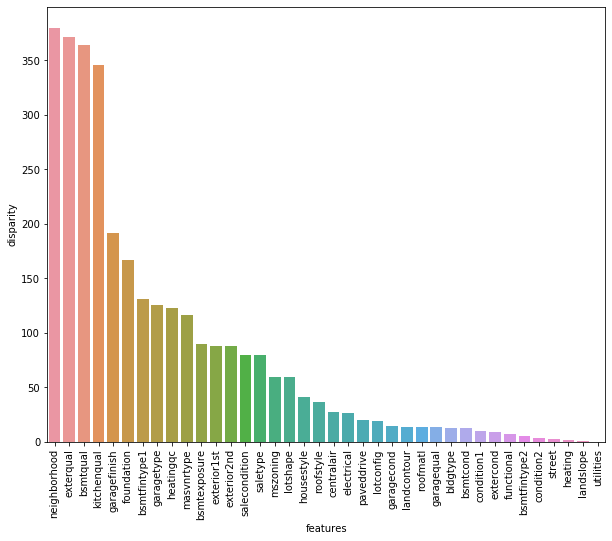

In [46]:
cat_data = hp.select_dtypes(exclude=[np.number])
plt.rcParams['figure.figsize'] = (10.0, 8.0)
cat = [f for f in hp.columns if hp.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['saleprice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['saleprice'] = hp.saleprice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 

plt 

**KEEP THE TOP 4 FEATURES -- KITCHENQUAL,EXTERQUAL,BSMTQUAL,NEIGHBORHOOD**

In [0]:
hp_cats=hp[['kitchenqual','exterqual',"bsmtqual",'neighborhood']]

In [48]:
hp_cats.head()

,kitchenqual,exterqual,bsmtqual,neighborhood
0,Gd,Gd,Gd,CollgCr
1,TA,TA,Gd,Veenker
2,Gd,Gd,Gd,CollgCr
3,Gd,TA,TA,Crawfor
4,Gd,Gd,Gd,NoRidge


**CONCATENATE TOP 4 CATEGORICALS AND CONTINUOUS FEATURES**

In [0]:
super = pd.concat([hp[nol], hp_cats], axis=1, join='inner')
super.drop('saleprice',axis=1,inplace=True)

In [50]:
super.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,masvnrarea,bsmtfinsf1,bsmtunfsf,firstflrsf,secondflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,kitchenqual,exterqual,bsmtqual,neighborhood
0,60,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,Gd,Gd,Gd,CollgCr
1,20,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,TA,TA,Gd,Veenker
2,60,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,Gd,Gd,Gd,CollgCr
3,70,60.0,9550,7,5,0.0,216,540,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,Gd,TA,TA,Crawfor
4,60,84.0,14000,8,5,340.0,655,490,1145,1053,2161,1,2,1,4,1,9,1,3,786,192,84,Gd,Gd,Gd,NoRidge


In [51]:
super.shape

(1094, 26)

**ONE-HOT ENCODE**

In [0]:
super_dummy=pd.get_dummies(super,drop_first=True)

In [0]:
super_dummy.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,masvnrarea,bsmtfinsf1,bsmtunfsf,firstflrsf,secondflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,exterqual_Fa,exterqual_Gd,exterqual_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
target=hp['saleprice']
y=target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(super_dummy, y, test_size = 0.2, random_state = 465)

In [58]:
super_dummy.shape

(1094, 55)

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

////////////////////////////////////////////////////////////////////////

 ## **RIDGE REGRESSION**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [70]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)),"Mean Squared Error Train")
print(r2_score(y_train, pred_train_rr),"R_Squared Train")

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

30848.090235788157 Mean Squared Error Train
0.8635573082239052 R_Squared Train
27480.72138232048
0.8864956786447588


In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
feature_difference = set(X_train) - set(X_test)
feature_difference

set()

In [73]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [78]:
train_score

0.8635573560619435

In [79]:
test_score

0.8864784156896117

In [0]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [81]:
Ridge_train_score

0.8635573082239052

In [82]:
Ridge_test_score

0.8864956786447588

In [0]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [84]:
Ridge_train_score100

0.8264115589604945

In [85]:
Ridge_test_score100

0.8548695053568351

**RIDGE WITH CROSS-VALIDATION-- slight improvement**

In [0]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)

In [87]:
clf.score(X_test, y_test)

0.8876180911751539

##**LASSO**

In [0]:
from sklearn.linear_model import Lasso

In [90]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)),'Mean Squared Error Train')
print(r2_score(y_train, pred_train_lasso), 'R Squared')

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

30848.08484986103 Mean Squared Error Train
0.8635573558683671 R Squared
27482.798793295817
0.8864785172295148


In [91]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print( "number of features used: ", coeff_used)

training score: 0.8635554202989489
test score:  0.8864864060180669
number of features used:  55


In [92]:
train_score=lasso.score(X_train,y_train)
train_score

0.8635554202989489

**GRID SEARCH**

In [0]:
lasso = Lasso()

In [0]:
parameters={'alpha':[1e-15,1e-10,1e-5,1e-2,1,5,10,120]}

In [0]:
lasso_reg=GridSearchCV(lasso,parameters,cv=5)

In [96]:
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 5, 10, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
lasso_reg.best_params_

{'alpha': 120}

In [98]:
lasso_reg.best_score_

0.8250240944229524

**ANOTHER CROSS-VALIDATION**

In [0]:
from sklearn.model_selection import cross_val_score

In [100]:
scores = cross_val_score(lasso, X_test, y_test, cv=5)
scores

array([0.89880759, 0.81952824, 0.91300647, 0.83880284, 0.84719365])

In [101]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.07)


**ANTOHER CROOS-VALIDATOR -- PICKS ITS OWN LAMNDA -- not very good?**

In [0]:
lasso = linear_model.LassoCV()

In [103]:
lasso.fit(X_train, y_train)
# The estimator chose automatically its lambda:
lasso.alpha_

231521.550937265

In [104]:
train_score=lasso.score(X_train,y_train)
train_score

0.6844704035271184

In [105]:
test_score=lasso.score(X_test,y_test)
test_score

0.7031134241451137

/////////////////////////////////////////////////////////////////////////////

**RIDGE WITH CV = BEST SCORE**

///////////////////////////////////////////////////////////////////////////////////////////////

**ELASTICNET**

In [110]:
 from sklearn.linear_model import ElasticNet
 #Elaic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)),"Mean Squared Error Train")
print(r2_score(y_train, pred_train_enet),'R Squared Train')

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

31124.547898599547 Mean Squared Error Train
0.8611007767671633 R Squared Train
27261.807423593244
0.8882968475821172


////////////////////////////////////////////////////////////////////////////////////////////////